# University Data Analysis Project

Denis Kuznetsov

In [71]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import geopandas

In [2]:
#load data
dataset = pd.read_csv("survey_data.csv", header = 0)

# Prepare data
## Dataframe information

#### 1.Print the dataset number of rows. Example: Number of rows: 10 

In [3]:
print("The number of rows: ", dataset.shape[0])

The number of rows:  629


#### 2. Please print the dataset number of columns. Example: Number of columns: 10

In [4]:
print("The number of columns: ", dataset.shape[1])

The number of columns:  32


#### 3. Please print all the columns names.

In [5]:
print("\nColumn names:")
for index in dataset.dtypes.keys():
    print(index)


Column names:
begin_time
end_time
wants_SD
wants_smart_lights
wants_smart_vacuum
wants_smart_sockets
wants_smart_climatization
wants_smart_door
wants_smart_door bell
wants_smart_blinds
wants_smart_surveilance
wants_smart_pets
wants_smart_others
has_SD
owns_SD_redy
owns_SD_vacuum
owns_SD_sockets
owns_SD_lights
owns_SD_surveilance
owns_SD_blinds
owns_SD_climatization
owns_SD_voice assistant
owns_SD_tv
owns_SD_washing_machine
owns_SD_dryer
owns_SD_fridge
owns_SD_cooking_robot
owns_SD_music
owns_SD_others
age
gender
country


#### 4. What different values of answers do you have in the wants_SD column?

In [6]:
print("\nTypes of answers in 'wants_SD': ", dataset["wants_SD"].unique())


Types of answers in 'wants_SD':  ['Sim' 'Não']


#### 5. How many values per answer value do you have? 
###### Print the values following this example: 
Sim: <total number of "Sim" answers><br>
Não: <total number of "Não" answers>

In [7]:
print("\nThe number of Sim: ", dataset.query("wants_SD == 'Sim'").shape[0])
print("The number of Não: ", dataset.query("wants_SD == 'Não'").shape[0])


The number of Sim:  568
The number of Não:  61


#### 6. Translate this column to have boolean values according the values (Sim is True, Não is False) 

In [8]:
dataset["wants_SD"] = dataset["wants_SD"].map({'Sim': True, 'Não': False})
print(dataset["wants_SD"])

0       True
1       True
2       True
3       True
4       True
       ...  
624     True
625     True
626    False
627     True
628     True
Name: wants_SD, Length: 629, dtype: bool


#### 7. Confirm you have the same count for your column new values
True count must equal question 5 Sim count<br>
False count must equal question 5 Não count

In [9]:
print("\nThe number of True: ", dataset.query("wants_SD == True").shape[0])
print("The number of False: ", dataset.query("wants_SD == False").shape[0])


The number of True:  568
The number of False:  61


#### 8. Change "has_SD" column to "owns_SD"

In [10]:
dataset.rename(columns = {"has_SD": "owns_SD"}, errors = "raise", inplace = True)

#### 9. Count the "Sim" occurrences. What is the problem? Solve this problem with a lambda function

In [11]:
dataset["owns_SD"] = dataset["owns_SD"].apply(lambda ans: ans.replace(" ", ""))
print("\nThe number of Sim: ", dataset.query("owns_SD == 'Sim'").shape[0])


The number of Sim:  205


#### 10. Use lambdas again to replace Sim for True and Não for False

In [12]:
dataset["owns_SD"] = dataset["owns_SD"].apply(lambda val: True if val == "Sim" \
                                              else False)
print(dataset["owns_SD"])

0       True
1       True
2      False
3      False
4       True
       ...  
624     True
625    False
626    False
627    False
628     True
Name: owns_SD, Length: 629, dtype: bool


# Evaluating your data

#### 1. The target customer segment is people from both genders, with ages from 30 to 55. Is this survey data valid for this requirement? Please represent a table with this information and also a histogram with KDE line to help us see this information

                        wants_SD  owns_SD
age  gender                              
30.0 Feminino                  2        2
     Masculino                 8        3
31.0 Feminino                  1        0
     Masculino                13        9
32.0 Feminino                  1        0
     Masculino                 9        5
33.0 Feminino                  5        1
     Masculino                 4        2
34.0 Feminino                  3        1
     Masculino                 6        2
35.0 Feminino                  6        0
     Masculino                13        4
36.0 Feminino                  9        4
     Masculino                10        3
37.0 Feminino                  8        3
     Masculino                19        8
     Prefiro não dizer         1        1
38.0 Feminino                  9        2
     Masculino                15        9
39.0 Feminino                  7        2
     Masculino                 8        3
40.0 Feminino                  6  

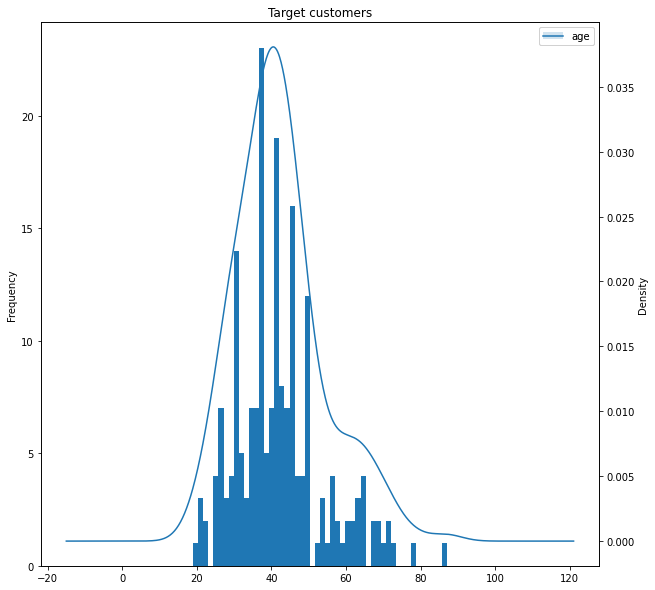

In [13]:
fig1, ax1 = plt.subplots(figsize = (10, 10))

hist = dataset.query("wants_SD == True" and "owns_SD == True")
hist = hist[["age"]]
#print(hist.describe())
hist.plot(kind = "hist", ax = ax1, bins = 50, title = "Target customers", \
         xlabel = "Age", ylabel = "Count")

ax2 = ax1.twinx()
hist.plot(kind = "kde", ax = ax2)

data1 = dataset.query("age >= 30")
data1 = data1.query("age <= 55")
data1 = data1.groupby(["age", "gender"])
data1 = data1[["wants_SD", "owns_SD"]].sum()
print(data1)

plt.show()

#### 2. How many answers did we get per country?

In [14]:
countries = dataset.groupby("country").count()
countries = countries["begin_time"]
print(countries)

country
Belgium                       2
Brazil                        8
Canada                        4
China                         1
Colombia                      1
Denmark                       1
Germany                       1
Kenya                         1
Mexico                        1
Mozambique                    1
NOT ANSWERED                 19
Netherlands                   2
Poland                        1
Portugal                    500
Qatar                         1
Spain                        80
Sweden                        1
Switzerland                   1
United Kingdom                1
United States of America      2
Name: begin_time, dtype: int64


#### 3. Plot teh gender distribution according specific geographies. Create three pie charts, one to plot gendere distribution in  Portugual, another for Spain and the last one for the rest of the world.
* create these plot in a figure with size 20 by 8
* Set title, x and y labels
* Display in each plot slice the percentage the count of anwers percentage with only one decimal place.

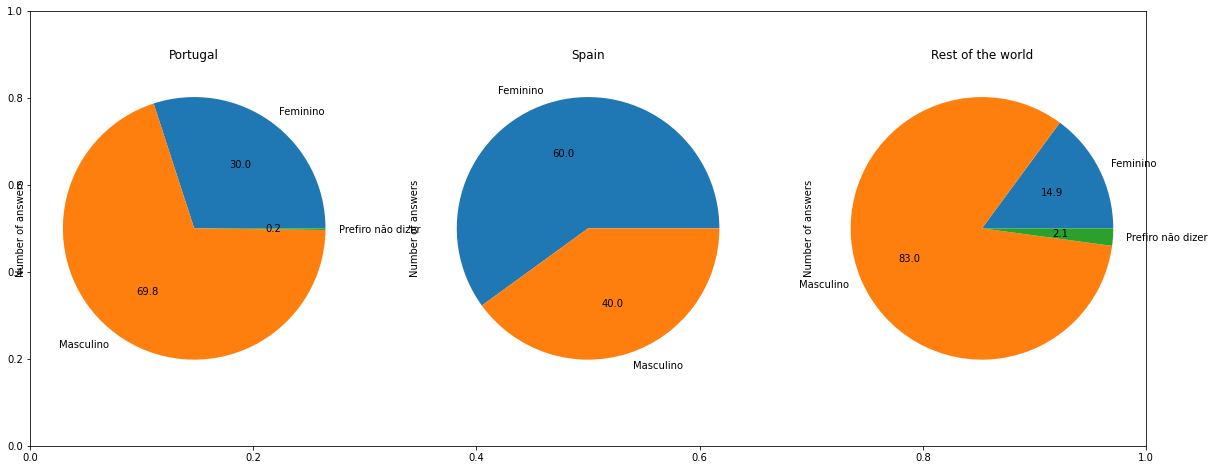

In [70]:
fig2, ax3 = plt.subplots(figsize = (20, 8))
spec = gridspec.GridSpec(ncols=3, nrows=1, figure=fig2)

#gender distribution in Portugal
ax31 = fig2.add_subplot(spec[0, 0])
gendersPt = dataset.query("country == 'Portugal'")
gendersPt = gendersPt.groupby("gender").count()
gendersPt = gendersPt["begin_time"]
gendersPt.rename("Number of answers", inplace = True)
gendersPt.plot(kind="pie", autopct='%.1f', ax = ax31, title = "Portugal")

#gender distribution in Spain
ax32 = fig2.add_subplot(spec[0, 1])
gendersEs = dataset.query("country == 'Spain'")
gendersEs = gendersEs.groupby("gender").count()
gendersEs = gendersEs["begin_time"]
gendersEs.rename("Number of answers", inplace = True)
gendersEs.plot(kind="pie", autopct='%.1f', ax = ax32, title = "Spain")

#gender distribution in the rest of the world
ax33 = fig2.add_subplot(spec[0, 2])
gendersRow = dataset.query("country != 'Portugal'")
gendersRow = gendersRow.query("country != 'Spain'")
gendersRow = gendersRow.groupby("gender").count()
gendersRow = gendersRow["begin_time"]
gendersRow.rename("Number of answers", inplace = True)
gendersRow.plot(kind="pie", autopct='%.1f', ax = ax33, title = "Rest of the world")

plt.show()

##### 4. What are the devices people most want?

#### 4.1 Create a new data set only with the columns you need to answer this question and print it.

In [59]:
'''
wants = {}

for name, content in dataset.query("wants_SD == True").iteritems():
    if "wants" in name:
        temp = content.value_counts()
        name = name.replace("wants_", "")
        if True in temp.index:
            wants[name] = temp.loc[True]
        else:
            wants[name] = 0
wants.pop("SD")
'''

wants = dataset.query("wants_SD == True").sum()[3:13]
wants.index = wants.index.str.replace("wants_", "")



df_wants = pd.DataFrame({'Number of interested people': wants})
df_wants.sort_values(by = "Number of interested people", ascending = False, inplace = True)
print(df_wants)

                    Number of interested people
smart_lights                                486
smart_climatization                         427
smart_blinds                                399
smart_surveilance                           372
smart_sockets                               286
smart_vacuum                                263
smart_door                                  215
smart_door bell                             158
smart_pets                                  125
smart_others                                  0


#### 4.2 Plot the dataset created in 4.1 using a bar plot.
* create this plot in a figure with size 8 by 8
* Set title, x and y labels
* order the results in descending order
* set the total count per smart device in its correspondent column bar
* identify clusters of products. To do this, identify wich bar differs more than 50 votes from previous one and paint it red

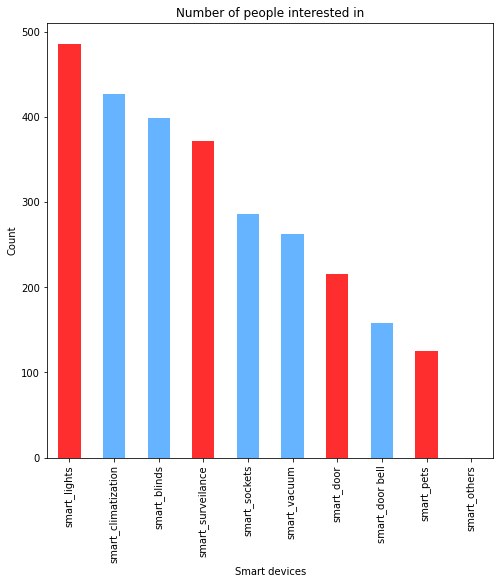

In [61]:
fig3, ax4 = plt.subplots(figsize = (8, 8))

colors = []
for index, value in df_wants.iterrows():
    if index == "smart_lights":
        prev_index = index
        continue
    if (df_wants.loc[prev_index, "Number of interested people"] - \
            df_wants.loc[index, "Number of interested people"]) > 50:
        colors.append("#ff2e2e")
    else:
        colors.append("#66b3ff")
    prev_index = index
colors.append("#66b3ff")

df_wants["Number of interested people"].plot(kind = "bar", title = "Number of people interested in", \
                                      xlabel = "Smart devices", ylabel = "Count", color = colors)

plt.show()

#### 5.  Plot the answers resuls regarding smar devices ownertship. Create three pie charts, one for to plot only portuguese answers, other for spanish answers and the thir one for the rest of the world.
* create these plot in a figure with size 20 by 8
* Set title, x and y labels
* Display in each plot slice the percentage the count of anwers percentage with only one decimal place.

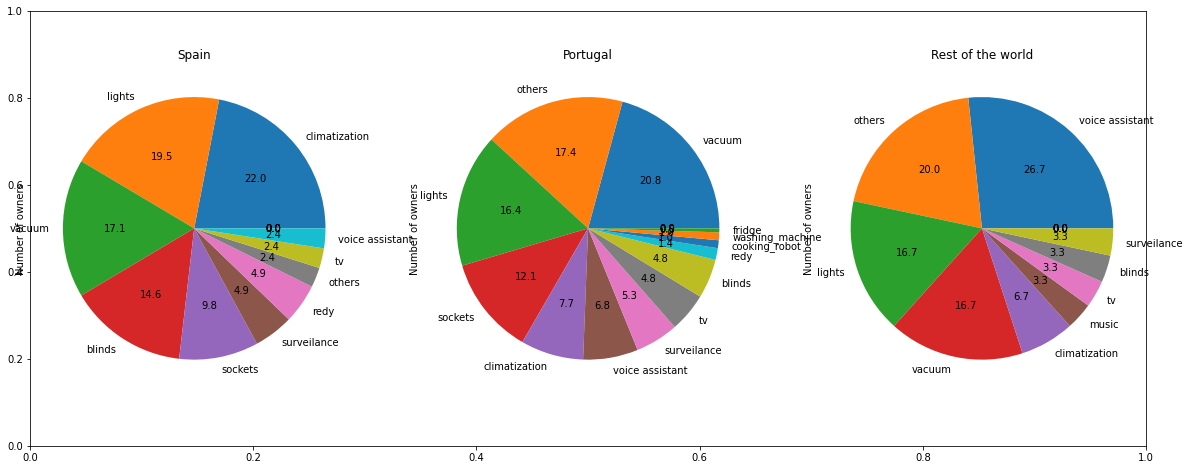

In [55]:
fig3, ax4 = plt.subplots(figsize = (20, 8))
spec2 = gridspec.GridSpec(ncols = 3, nrows = 1, figure = fig3)

#distribution of owned devices in Spain
df_owns = dataset.query("owns_SD == True")
df_ownsEs = df_owns.query("country == 'Spain'")

df_ownsEs = df_ownsEs.sum()[14:29].transpose()
df_ownsEs.rename("Number of owners", inplace = True)
df_ownsEs.index = df_ownsEs.index.str.replace("owns_SD_", "")

ax41 = fig3.add_subplot(spec[0, 0])
df_ownsEs.sort_values(ascending = False, inplace = True)
df_ownsEs.plot(kind = "pie", ax = ax41, y = "Number of owners", autopct = "%.1f", \
               legend = None, title = "Spain")

#distribution of owned devices in Portugal
df_ownsPt = df_owns.query("country == 'Portugal'")

df_ownsPt = df_ownsPt.sum()[14:29].transpose()
df_ownsPt.rename("Number of owners", inplace = True)
df_ownsPt.index = df_ownsPt.index.str.replace("owns_SD_", "")

ax42 = fig3.add_subplot(spec[0, 1])
df_ownsPt.sort_values(ascending = False, inplace = True)
df_ownsPt.plot(kind = "pie", ax = ax42, y = "Number of owners", autopct = "%.1f", \
               legend = None, title = "Portugal")

#distribution of owned devices in the rest of the world
df_ownsRow = df_owns.query("country != 'Portugal'")
df_ownsRow = df_ownsRow.query("country != 'Spain'")
           
df_ownsRow = df_ownsRow.sum()[14:29].transpose()
df_ownsRow.rename("Number of owners", inplace = True)
df_ownsRow.index = df_ownsRow.index.str.replace("owns_SD_", "")

ax43 = fig3.add_subplot(spec[0, 2])
df_ownsRow.sort_values(ascending = False, inplace = True)
df_ownsRow.plot(kind = "pie", ax = ax43, y = "Number of owners", autopct = "%.1f", \
                legend = None, title = "Rest of the world")

plt.show()

#### 6. Plot the all the own devices comulative count in a bar plot
* create this plot in a figure with size 8 by 8
* Set title, x and y labels
* order the results in descending order
* set the total count per smart device in its correspondent column bar

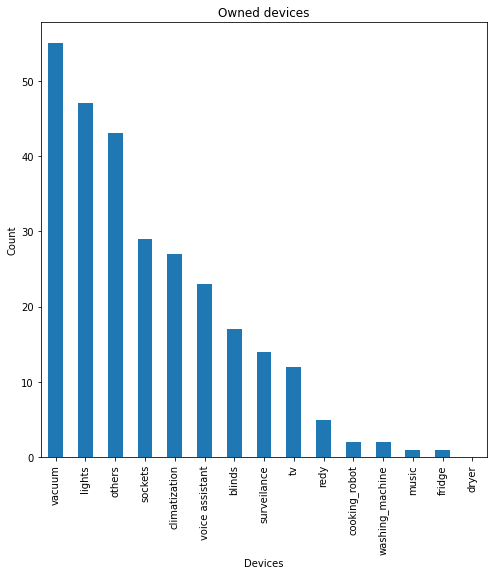

In [57]:
fig4, ax5 = plt.subplots(figsize = (8, 8))

df_owns = dataset.query("owns_SD == True")

df_owns = df_owns.sum()[14:29].transpose()
df_owns.rename("Number of owners", inplace = True)
df_owns.index = df_owns.index.str.replace("owns_SD_", "")
df_owns.sort_values(ascending = False).plot(kind = "bar", ax = ax5, \
                                                                title = "Owned devices", \
                                                                xlabel = "Devices", \
                                                                ylabel = "Count")

plt.show()  

## Bonus Challange
What was the geografical reach of this survey? Try to plot a map and paint in it all the countries from where we got ansers.

<b>HINT</b><br>
You are free to use whatever you want, but you can use the geopandas library for this

<AxesSubplot:>

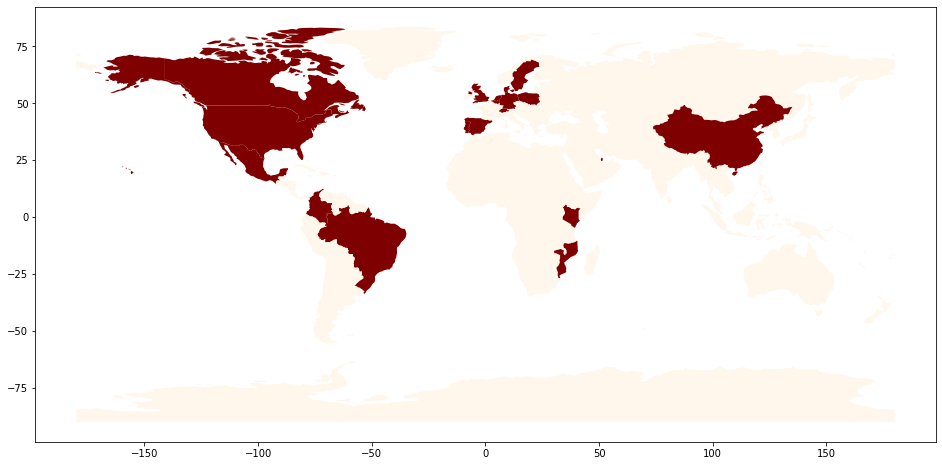

In [79]:
fig5, ax6 = plt.subplots(figsize = (20, 8))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.insert(0, "answered in", 0)
countries_map = []

for name in world.iterrows():
    if name[1]["name"] in countries.index:
        world.loc[name[0], "answered in"] = 100
    else:
        world.loc[name[0], "answered in"] = 0

world.plot(column = "answered in", cmap = 'OrRd', ax = ax6)